<a href="https://colab.research.google.com/github/ronald-hk-chung/ssnotebook/blob/main/computer_vision/lenet5_on_emnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet-5 on EMNIST

<img src="https://github.com/ronald-hk-chung/ssnotebook/blob/main/computer_vision/assets/emnist.png?raw=true">

Extended MNIST (EMINST) is a new dataset developed and released by NIST to be the sucessor to MNIST. EMNIST includes all the images from NIST Special Database 19, which is a large database of handwritten uppercase and lower case letters as well as digits.

Reference: https://www.nist.gov/itl/products-and-services/emnist-dataset

<br/>

Note that there are 6 different splits for the dataset

**ByClass and ByMerge datsets**

The full complement of the NIST Special Database 19 is available in the ByClass and ByMerge splits. These two datasets have the same image information but differ in the number of images in each class. Both datasets have an uneven number of images per class and there are more digits than letters. The number of letters roughly equate to the frequency of use in the English language.

* train: 697,932
* test: 116,323
* total: 814,255
* classes: ByClass 62 (unbalanced) / ByMerge 47 (unbalanced)

**Balanced dataset**

The EMNIST Balanced dataset is meant to address the balance issues in the ByClass and ByMerge datasets. It is derived from the ByMerge dataset to reduce mis-classification errors due to capital and lower case letters and also has an equal number of samples per class. This dataset is meant to be the most applicable.

* train: 112,800
* test: 18,800
* total: 131,600
* classes: 47 (balanced)

**Letters datasets**

The EMNIST Letters dataset merges a balanced set of the uppercase and lowercase letters into a single 26-class task.

* train: 88,800
* test: 14,800
* total: 103,600
* classes: 26 (balanced)

**Digits and MNIST datsets**

The EMNIST Digits and EMNIST MNIST dataset provide balanced handwritten digit datasets directly compatible with the original MNIST dataset.

* train: Digits 240,000 / MNIST 60,000
* test: Digits 40,000 / MNIST 10,000
* total: Digits 280,000 / MNIST 70,000
* classes: 37 (balanced)

<br/>

Below shows a visual breakdown by split in EMNIST dataset

<img src="https://github.com/ronald-hk-chung/ssnotebook/blob/main/computer_vision/assets/visual_breakdown_emnist.PNG?raw=true">

## Mission Statement

1. Build a LeNet-5 model to achieve reasonable accuracy in the EMNIST Letters dataset
3. Visualise model feature maps and classifier layers using hooks

Below shows the Leaderboard under paperswithcode on accuracy of different models

Reference: https://paperswithcode.com/sota/image-classification-on-emnist-letters

<img src="https://github.com/ronald-hk-chung/ssnotebook/blob/main/computer_vision/assets/emnist_letters_leaderboard.PNG?raw=true">

## Downloading the dataset from Torchvision

PyTorch domain libraries provide pre-loaded datasets under `torchvision.datasets` for EMNIST

Reference: https://pytorch.org/vision/main/generated/torchvision.datasets.EMNIST.html

To download the dataset, we will need to provide the following parameters:

*   **root (str or pathlib.Path)**
    Root directory of dataset where EMNIST/raw/train-images-idx3-ubyte and EMNIST/raw/t10k-images-idx3-ubyte exist.

*   **split (string)**
    The dataset has 6 different splits: byclass, bymerge, balanced, letters, digits and mnist. This argument specifies which one to use.

*   **train (bool, optional)**
    If True, creates dataset from training.pt, otherwise from test.pt.

*   **download (bool, optional)**
    If True, downloads the dataset from the internet and puts it in root directory. If dataset is already downloaded, it is not downloaded again.

*   **transform (callable, optional)**
    A function/transform that takes in a PIL image and returns a transformed version. E.g, transforms.RandomCrop

*   **target_transform (callable, optional)**
    A function/transform that takes in the target and transforms it.

In [2]:
import torch
import torchvision
from torchvision.datasets import EMNIST
from torchvision.transforms import ToTensor

# Setup train_ds and valid_ds
train_ds = EMNIST(root='data',
                  split='letters',
                  train=True,
                  download=True,
                  transform=ToTensor(),
                  target_transform=None)

valid_ds = EMNIST(root='data',
                  split='letters',
                  train=False,
                  download=True,
                  transform=ToTensor(),
                  target_transform=None)

100%|██████████| 561753746/561753746 [00:11<00:00, 47684621.07it/s]


Extracting data/EMNIST/raw/gzip.zip to data/EMNIST/raw


In [3]:
from torch.utils.data import DataLoader

train_dl = DataLoader(dataset=train_ds,
                      batch_size=32,
                      shuffle=True)

valid_dl = DataLoader(dataset=valid_ds,
                      batch_size=32,
                      shuffle=False)

## Exploring the EMNIST Dataset

In [4]:
# Check number of datapoints
train_ds, valid_ds

(Dataset EMNIST
     Number of datapoints: 124800
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset EMNIST
     Number of datapoints: 20800
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [6]:
# Set class_names and class_to_idx
classes = train_ds.classes
class_to_idx = train_ds.class_to_idx
class_to_idx, len(classes)

({'N/A': 0,
  'a': 1,
  'b': 2,
  'c': 3,
  'd': 4,
  'e': 5,
  'f': 6,
  'g': 7,
  'h': 8,
  'i': 9,
  'j': 10,
  'k': 11,
  'l': 12,
  'm': 13,
  'n': 14,
  'o': 15,
  'p': 16,
  'q': 17,
  'r': 18,
  's': 19,
  't': 20,
  'u': 21,
  'v': 22,
  'w': 23,
  'x': 24,
  'y': 25,
  'z': 26},
 27)

In [7]:
# Looking at distributions for both train and valid dataset
train_ds.targets.unique(return_counts=True)

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25, 26]),
 tensor([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
         4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
         4800, 4800]))

In [8]:
valid_ds.targets.unique(return_counts=True)

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25, 26]),
 tensor([800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800,
         800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800]))

EMIST letters as stated above is a balanced dataset with each class A-Z (idx 1-26) having 4800 training datapoints and 800 valid datapoints

## Visualising EMNIST data batch

In [9]:
# Visualise the the first train_ds
img, label = train_ds[0]
img.shape, label

(torch.Size([1, 28, 28]), 23)

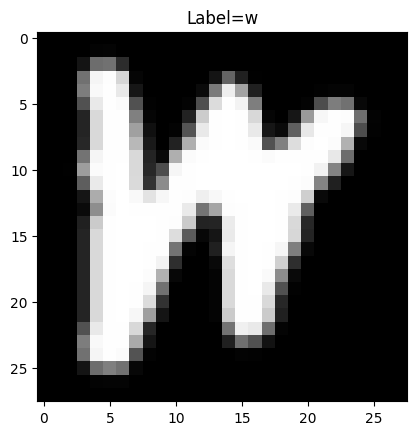

In [10]:
# Visualise the first img
import matplotlib.pyplot as plt

# have to transpose the image to see it in the correct orientation
plt.imshow(img.squeeze().T, cmap='gray')
plt.title(f'Label={classes[label]}');

In [11]:
images, labels = next(iter(train_dl))
images.shape, labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

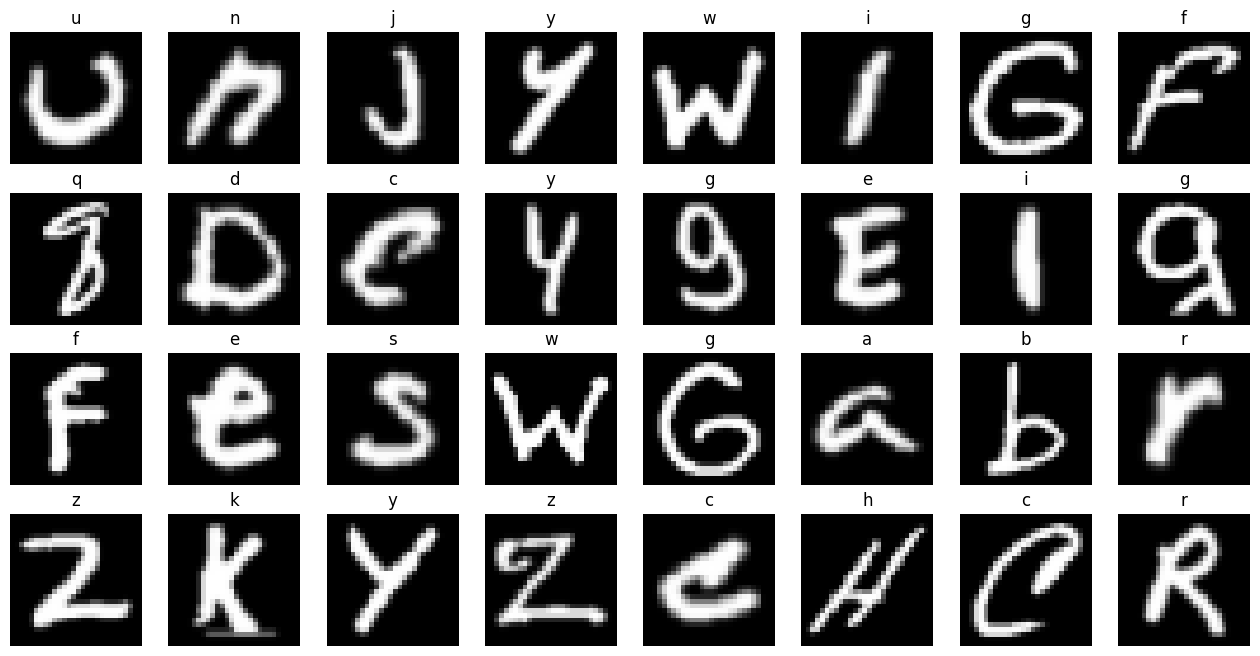

In [12]:
# Show one batch of data
fig = plt.figure(figsize=(16, 8))
rows, cols = 4, 8
for i, image in enumerate(images):
    plt.subplot(rows, cols, i+1)
    plt.imshow(image.squeeze().T, cmap='gray')
    plt.title(classes[labels[i]])
    plt.axis(False)

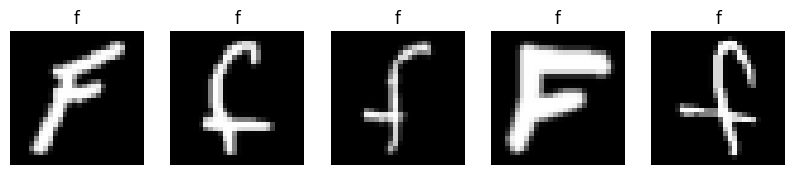

In [13]:
# Visualise a class - f
import numpy as np

class_num = class_to_idx['f']
random_idx = np.random.choice(torch.nonzero(train_ds.targets==class_num).squeeze().numpy(),
                              size=5,
                              replace=True)

fig = plt.figure(figsize=(10, 3))
for i, idx in enumerate(random_idx):
    img, label = train_ds[idx]
    plt.subplot(1, 5, i+1)
    plt.imshow(img.squeeze().T, cmap='gray')
    plt.title(classes[label])
    plt.axis(False)

## Import SSTLearner and TinyVGG


In [14]:
!pip -q install git+https://github.com/ronald-hk-chung/sstorch.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 17.9 MB/s eta 0:00:00


## Defining our model for EMNIST-Letters - LeNet-5

LeNet-5 is a seven-layer convolutional neural network developed by Yann LeCun in 1998 to recongnize hand-written digits in 28x28 pixel images - the famous MNIST dataset. It is one of the earliest pre-trained models proposed in the research paper [Gradeint-Based Learning Applied to Document Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf).

The main reason behind the popularity of this model was its simple straightforward architecture.

Belows shows the architecture of the LeNet-5 model

<img src="https://github.com/ronald-hk-chung/ssnotebook/blob/main/computer_vision/assets/lenet-5.png?raw=true">

Note that the typical convsolutional blocks are already presented with convolution **C layers**, activation function (not shown in above graph) and subsampling **S layers**. The notable differences are:

1. the subsampling was more complex than max pooling, but then general idea still holds
2. the activation function, **Sigmoid** at the time, was applied after the subsampling instead of before which is in most typical in modern architecture
3. The **F6** and **Output layers** were connected by something called Gaussian connections, which is more complex than the typial activation function one would use today.

We will adapt LeNet-5 to today's standard and implimented as below:

In [15]:
from torch import nn
from collections import OrderedDict

class LeNet5(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()

        self.feature = nn.Sequential(OrderedDict([
            # Block 1, 1@28x28 -> 6@28x28 -> 6@14x14
            # Note that we are using padding=2 to add padding to each side of 28x28 -> 32x32
            ('C1', nn.Conv2d(in_channels=in_features, out_channels=6, kernel_size=5, padding=2)),
            ('func1', nn.ReLU()),
            ('S2', nn.MaxPool2d(kernel_size=2)),
            # Block 2, 6@14x14,-> 16@10x10,-> 16@5x5
            ('C3', nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)),
            ('func2', nn.ReLU()),
            ('S4', nn.MaxPool2d(kernel_size=2)),
            # Block 3, 16@5x5,-> 120@1x1
            ('C5', nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5)),
            ('func3', nn.ReLU()),
            ('flatten', nn.Flatten())
        ]))
        self.classifier = nn.Sequential(OrderedDict([
            ('F6', nn.Linear(in_features=120, out_features=84)),
            ('func4', nn.ReLU()),
            ('output', nn.Linear(in_features=84, out_features=out_features))
        ]))
    def forward(self, X):
        return self.classifier(self.feature(X))

In [17]:
model=LeNet5(in_features=1,
             out_features=len(classes))
model

LeNet5(
  (feature): Sequential(
    (C1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (func1): ReLU()
    (S2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (C3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (func2): ReLU()
    (S4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (C5): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (func3): ReLU()
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (F6): Linear(in_features=120, out_features=84, bias=True)
    (func4): ReLU()
    (output): Linear(in_features=84, out_features=27, bias=True)
  )
)

## Setting up loss_fn and metric_fn

For multi-class classification, we will setup
* nn.CrossEntropyLoss() as `loss_fn`

    **Cross-Entropy Loss** is a loss function that is commonly used to quantify the difference between 2 probabilities distribution.

    where p(x) is the output probability and q(x) is the true probability


$$
H(p, q)=-\sum_x p(x) \log q(x) .
$$

<br/>

* macro Average on Accuracy, Precision, Recall and F1 for `metric_fn`

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

$$
{Precision}_{macro}=\frac{1}{n}\sum_{t=1}^n \frac{{TP}_i}{{TP}_i + {FP}_i}
$$

$$
{Recall}_{macro}=\frac{1}{n}\sum_{t=1}^n \frac{{TP}_i}{{TP}_i + {FN}_i}
$$

$$
{F1score}_{macro}=2 \times \frac{{Precision}_{macro} * {Recall}_{macro}}{{Precision}_{macro} + {Recall}_{macro}}
$$



In [18]:
# Setting up loss_fn
loss_fn = nn.CrossEntropyLoss()
loss_fn

CrossEntropyLoss()

In [19]:
# Setting up metric_fn

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def metric_fn(y_logits, y):
    """ Return dictionary of metrics of accuracy_score, precision_score, recall_score and f1_score
    """
    # Make prediction using argmax and turn into numpy array
    y_preds = torch.argmax(y_logits, dim=-1).detach().cpu().numpy()
    y = y.detach().cpu().numpy()

    # Calculate scores from using sklearn.metrics
    accuracy = accuracy_score(y, y_preds)
    precision = precision_score(y, y_preds, average='macro', zero_division=0)
    recall = recall_score(y, y_preds, average='macro', zero_division=0)
    f1 = f1_score(y, y_preds, average='macro', zero_division=0)

    # SSTLearner supports returning a dictionary from metric_fn
    return {'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1}

metric_fn

<function __main__.metric_fn(y_logits, y)>

## Training LeNet Learner using SSTLearner

In [20]:
from sstorch.learner import SSTLearner

lenet_learner = SSTLearner(model=model,
                         loss_fn=loss_fn,
                         metric_fn=metric_fn,
                         optimizer=torch.optim.SGD(params=model.parameters(), lr=0.1),
                         train_dataloader=train_dl,
                         valid_dataloader=valid_dl)

In [21]:
lenet_learner.model_info()

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
LeNet5 (LeNet5)                          [32, 1, 28, 28]      [32, 27]             --                   True
├─Sequential (feature)                   [32, 1, 28, 28]      [32, 120]            --                   True
│    └─Conv2d (C1)                       [32, 1, 28, 28]      [32, 6, 28, 28]      156                  True
│    └─ReLU (func1)                      [32, 6, 28, 28]      [32, 6, 28, 28]      --                   --
│    └─MaxPool2d (S2)                    [32, 6, 28, 28]      [32, 6, 14, 14]      --                   --
│    └─Conv2d (C3)                       [32, 6, 14, 14]      [32, 16, 10, 10]     2,416                True
│    └─ReLU (func2)                      [32, 16, 10, 10]     [32, 16, 10, 10]     --                   --
│    └─MaxPool2d (S4)                    [32, 16, 10, 10]     [32, 16, 5, 5]       --                   --
│    └─Conv2d (C5)    

In [22]:
lenet_learner.train(5)

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | LR: 1.0E-01 | train_loss: 0.621 | valid_loss: 0.336 
train_metric: {'accuracy': 0.802, 'precision': 0.752, 'recall': 0.758, 'f1': 0.739}
valid_metric: {'accuracy': 0.893, 'precision': 0.401, 'recall': 0.37, 'f1': 0.384}
----------------------------------------------------------------------------------------------------
Epoch: 2 | LR: 1.0E-01 | train_loss: 0.257 | valid_loss: 0.247 
train_metric: {'accuracy': 0.914, 'precision': 0.879, 'recall': 0.88, 'f1': 0.87}
valid_metric: {'accuracy': 0.919, 'precision': 0.493, 'recall': 0.466, 'f1': 0.478}
----------------------------------------------------------------------------------------------------
Epoch: 3 | LR: 1.0E-01 | train_loss: 0.218 | valid_loss: 0.235 
train_metric: {'accuracy': 0.927, 'precision': 0.898, 'recall': 0.898, 'f1': 0.889}
valid_metric: {'accuracy': 0.922, 'precision': 0.486, 'recall': 0.46, 'f1': 0.472}
----------------------------------------------------------------------------------------------------
Epoch

We have ~93% after 5 epochs which is a reasonable result for EMNIST

## Visualize filters in LeNet-EMNIST model

We can access the weights of the layers to visualise how LeNet classify EMNIST

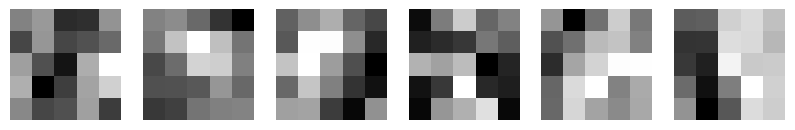

In [23]:
# Visualise Block1 C1 of LeNet
fig = plt.figure(figsize=(10,5))
rows, cols = 1, 6
for i, weight in enumerate(model.feature.C1.weight.data.cpu().numpy()):
    plt.subplot(rows, cols, i+1)
    plt.imshow(weight.squeeze(), cmap='gray')
    plt.axis(False)

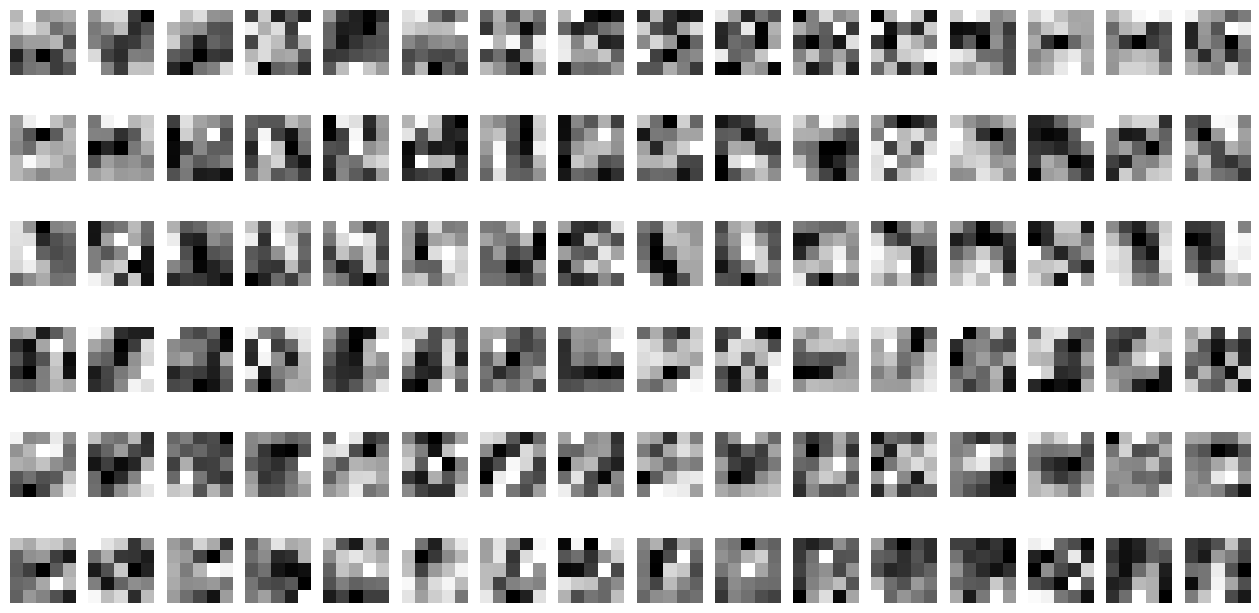

In [24]:
# Visualise Block2 C3 of LeNet
fig = plt.figure(figsize=(16,8))
rows, cols = 6, 16
i = 0
for channels in model.feature.C3.weight.data.cpu().numpy():
    for weight in channels:
        plt.subplot(rows, cols, i+1)
        plt.imshow(weight, cmap='gray')
        plt.axis(False)
        i += 1

It is certainly not easy to grasp how above filter are used to distinguihing between different classes in EMNIST dataset. To really understand the effect the filter, we need to viualize the intermediate values produced by our model

## Define Hooks for visualisation of feature maps

A hook is a way to force a model to execute a function either after its forward pass or after its backward pass. Hence, there are forward hooks and backward hooks. We will be using forward hooks to record the output of filters

SSTLearner class provided 2 in-built function for attaching hooks:

Summary of the function is as below:

`attach_foward_hooks`
```python
def attach_forward_hooks(self, layers_to_hook: list, hook_fn: Callable):
    """Method to attach custom forward hooks

    Args:
        layers_to_hook (list):    list of layers to hook
        hook_fn (Callable):   custom hook_fn in during forward pass
    """
    for name, layer in self.modules:
        if name in layers_to_hook:
            handle = layer.register_forward_hook(hook_fn)
            self.forward_hook_handles.append(handle)
```

`attach_backward_hooks`
```python
def attach_backward_hooks(self, layers_to_hook: list, hook_fn: Callable):
    """Method to attach custom backward hooks

    Args:
    layers_to_hook (list):    list of layers to hook
    hook_fn (Callable):   custom hook_fn in during backward pass
    """
    for name, layer in self.modules:
        if name in layers_to_hook:
            handle = layer.register_full_backward_hook(hook_fn)
            self.backward_hook_handles.append(handle)
```

PyTorch hooks are registered for each `Tensor` or `nn.Module` object and are triggered by either the forward or backward pass of the object. `hook_fn` has the following signatures:

```python
def module_hook(module: nn.Module, input: Tensor, output: Tensor):
    # For nn.Module objects only.
```

Each chook can modify the input, output, or internal Module parameters. Most commonly, they have many uses including most commonly debugging purposes. In this exercise, we will define the hook_fn to register the output into visualization dict for feature_map extractions.

In [34]:
# Get the module list using named_modules() and put into layer_names dictionary for recording
modules = list(lenet_learner.model.named_modules())
layer_names = {layer: name for name, layer in modules[1:]}

# Initialise empty visualization dict
visualization = {}

# Define hook function to register visualization
def hook_fn(layer, inputs, outputs):
    name = layer_names[layer]
    # insert output to visualization dictionary
    visualization[name] = outputs.detach().cpu().numpy()

In [35]:
# Attach the forward hook using attach_foward_hooks in SSTLearner class
lenet_learner.attach_forward_hooks(layers_to_hook=['feature.C1', 'feature.S2', 'feature.C3', 'feature.S4'],
                                   hook_fn=hook_fn)

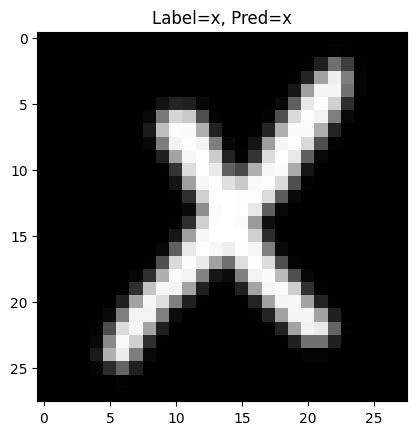

In [36]:
import random
# Chosing a random datapoint for a specific letter
letter = 'x'
choice = random.choice(torch.nonzero(train_ds.targets==class_to_idx[letter])).item()
img, label = train_ds[choice]

# Perform a forward pass and make prediction
logits = lenet_learner.predict(img.unsqueeze(0))
pred = logits.argmax(-1)

# Plot out the data with label and prediction
plt.imshow(img.squeeze().T, cmap='gray')
plt.title(f'Label={classes[label]}, Pred={classes[pred]}');

# Remove hook
lenet_learner.remove_hooks()

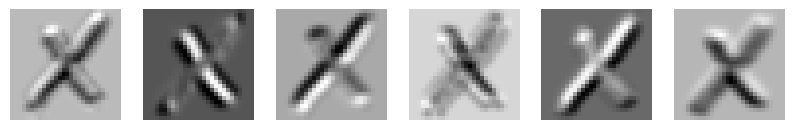

In [37]:
# Visualise output of C1 of LeNet
fig = plt.figure(figsize=(10,5))
rows, cols = 1, 6
for i, output in enumerate(visualization['feature.C1'].squeeze(0)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(output.T, cmap='gray')
    plt.axis(False)

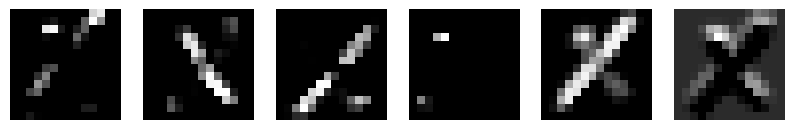

In [38]:
# Visualise output of S2 of LeNet
fig = plt.figure(figsize=(10,5))
rows, cols = 1, 6
for i, output in enumerate(visualization['feature.S2'].squeeze(0)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(output.T, cmap='gray')
    plt.axis(False)

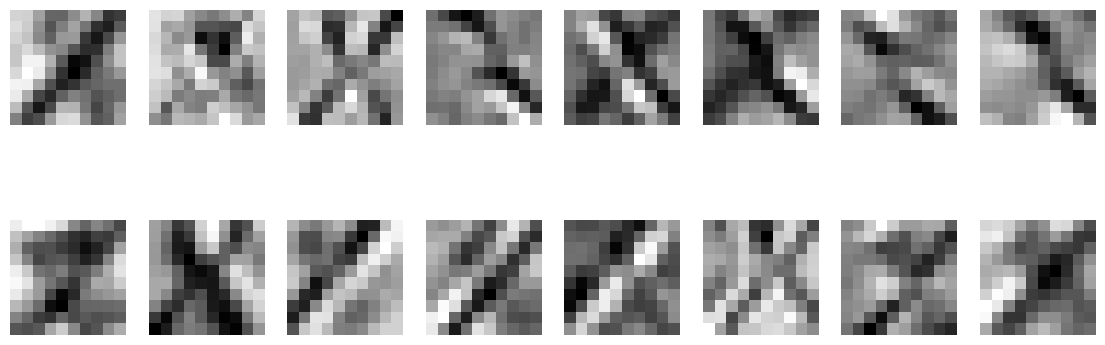

In [39]:
# Visualise output of C3 of LeNet
fig = plt.figure(figsize=(14,5))
rows, cols = 2, 8
for i, output in enumerate(visualization['feature.C3'].squeeze(0)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(output.T, cmap='gray')
    plt.axis(False)

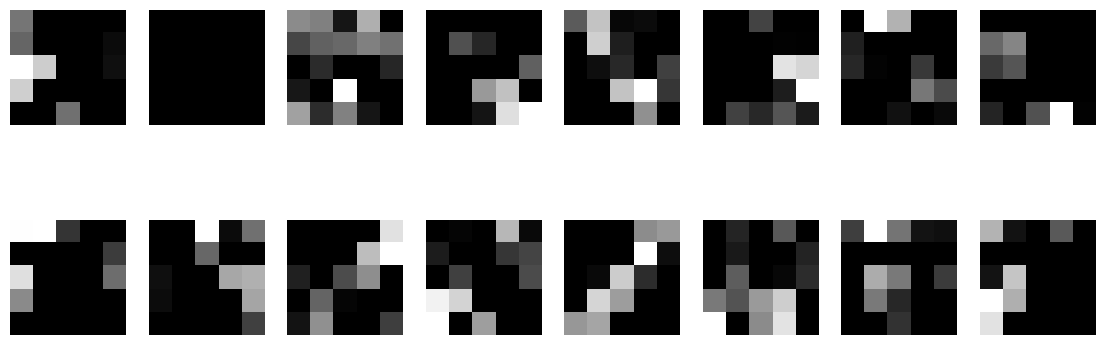

In [40]:
# Visualise output of S4 of LeNet
fig = plt.figure(figsize=(14,5))
rows, cols = 2, 8
for i, output in enumerate(visualization['feature.S4'].squeeze(0)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(output.T, cmap='gray')
    plt.axis(False)

From the above, we can see that C1 highlighted the edges and the S2 with Relu layer further highlights the cross diagonal line which is the prominent *feature* of **X**.  This also appears in C3 and layer S4 but it is harder for human eyes to distinguish which LeNet model took the flattened features to its classifier to produce the logits.

## Evaluate our model

Same as MNIST dataset, we will make full predictions for valid_ds and see where errors are

In [41]:
def make_predictions(model, data):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data:
            # Forward pass -> logits
            y_logits = model(X.unsqueeze(0).to(device))
            # Calculate Probabilities (logits -> prediction probabilities)
            y_probs = y_logits.squeeze(0).softmax(0)
            # Append as CPU
            pred_probs.append(y_probs.cpu())

    probs, preds = torch.stack(pred_probs).max(1)
    return probs, preds

In [43]:
# Make Full predictions that return probs (probability of prediction) and preds (predictions)
probs, preds = make_predictions(model, valid_ds)
probs.shape, preds.shape

(torch.Size([20800]), torch.Size([20800]))

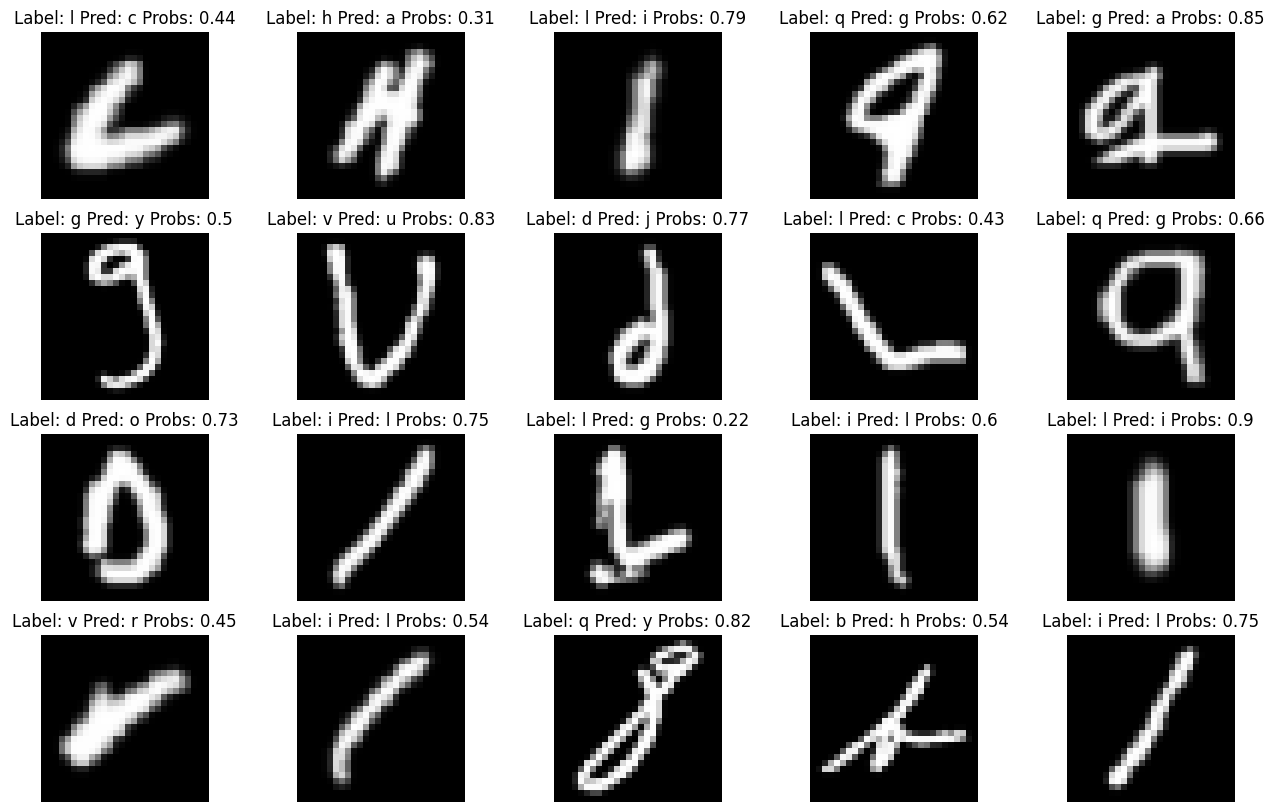

In [45]:
# Show incorrect predictions
import random
wrong_prediction_index = torch.nonzero(preds != valid_ds.targets).squeeze(1)

fig = plt.figure(figsize=(16, 10))
rows, cols = 4, 5
for i, index in enumerate(random.sample(list(wrong_prediction_index), k=rows*cols)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(valid_ds.data[index].data.T, cmap='gray')
    plt.title(f'Label: {classes[valid_ds.targets[index]]} Pred: {classes[preds[index]]} Probs: {round(probs[index].item(), 2)}')
    plt.axis(False)

As shown above, the errors are mostly coming from letters that are very difficult to distinguish even by humans.

To further understand the distribution of errors, we can plot out the confusion matrix

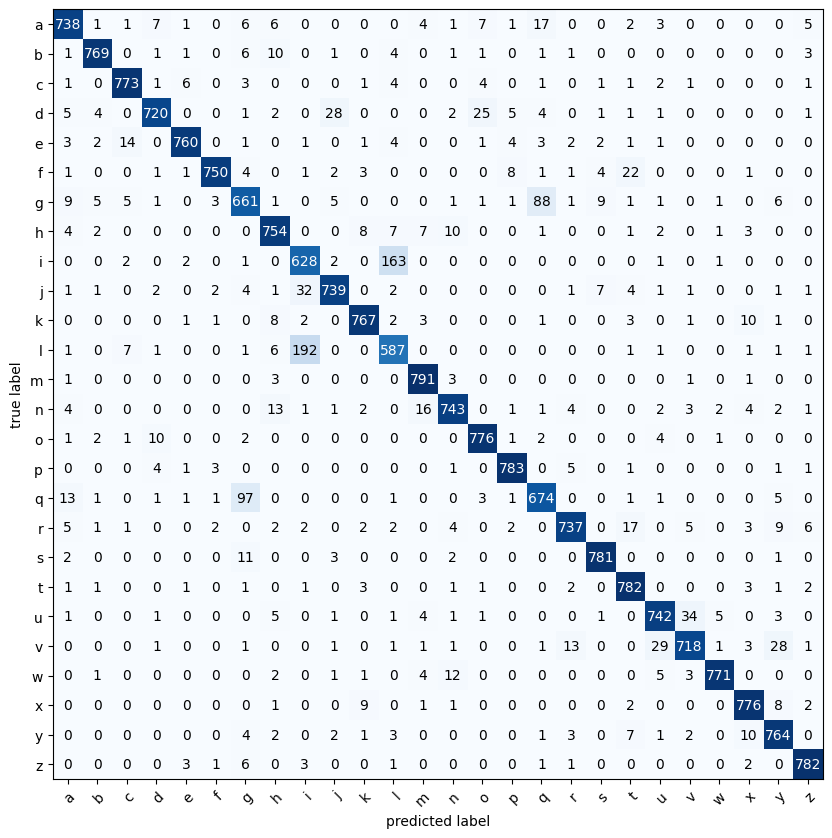

In [52]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

y_pred = preds.numpy()
y_target = valid_ds.targets.numpy()

cm = confusion_matrix(y_target=y_target,
                      y_predicted=y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                class_names=classes[1:],
                                figsize=(10, 10))

Most of the confusion appear between:
* i and l
* g and q

which is very reasonable!

## Notebook Summary:

1. Impliment LeNet-5 which is one of the earliest Convolutional Neural Network on tackling the MNIST and EMNIST dataset
2. Achieve 93% accuracy which is a reasonable result on both training and valid dataset
3. Understand the kernels/filters in CNN by visualising the weights and output
4. Understand usage of hooks in ad-hoc analysis in PyTorch workflow - registering output during forward-pass in order to visualise each filters/kernels output